In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lv import LV_oscillations

import matplotlib.pyplot as plt
import numpy as np

from flux import *
from xsec import *

from scipy.integrate import quad
from scipy.interpolate import interp1d

def sci_notation(number, sig_fig=1):
    ret_string = "{0:.{1:d}e}".format(number, sig_fig)
    a, b = ret_string.split("e")
    # remove leading "+" and strip leading zeros
    b = int(b)
    return a + r" \times 10^{%s}"%str(b)

In [3]:
# Possible Baselines

# ICECUBE

# Radius of earth
R_earth = 6371.0 # km

# Chicago latitude
lat = 41.88

# Baseline, approx sphere
alpha = ((90 - lat)/2)*np.pi/180
ICECUBE_BASELINE = np.sqrt(2*R_earth**2*(1 - np.cos((90+lat)*np.pi/180)))*1e3 # meters

# Others
PONE_BASELINE = 1758*1.60934*1e3
KM3NeT_BASELINE = 4427*1.60934*1e3

PONE_BASELINE/1e6, KM3NeT_BASELINE/1e6, ICECUBE_BASELINE/1e6

(2.82921972, 7.12454818, 11.634962593570254)

In [4]:
# 500 mega-tonne mass, baseline
MASS = 500e6

# density of water
DENSITY = 1 # t / m^3

VOLUME = MASS / DENSITY
RADIUS = np.power(VOLUME/((4./3.)*np.pi), 1./3.)
Emuon = 5e3

# Unpolarized
P = 0

# neutrino flavors
alpha = "mu"
beta = "mu"

In [5]:
Nbaselines = 500
Nenergies = 500
#baselines = np.logspace(1,4.1,Nbaselines)*1e3
baselines = np.logspace(0, np.log10(6.371*2), Nbaselines)*1e6
#energies = np.logspace(-1,3,Nenergies)*1e9
energies = np.logspace(np.log10(Emuon/10), np.log10(Emuon), Nenergies+1)[:-1] * 1e9

SM_cases = []
for baseline in baselines:
    SM_case = LV_oscillations(energies, baseline, 1)
    SM_cases.append(SM_case)

In [6]:
osc_probs_SM = np.zeros((Nbaselines,Nenergies))
for ibaseline,SM_case in enumerate(SM_cases):
    osc_probs_SM[ibaseline,:] = SM_case.get_oscillation_probability(alpha, beta)

In [7]:
# lorentz violation parameters
aeu=0
aet=0
aut=0#3e-24*1e9
ceu=0
cet=0
cut=1e-27
LV_cases = []
for baseline in baselines:
    LV_case = LV_oscillations(energies, baseline, 1,
                              aeu = aeu, aet = aet, aut = aut,
                              ceu = ceu, cet = cet, cut = cut)
    LV_cases.append(LV_case)

In [8]:

osc_probs = np.zeros((Nbaselines,Nenergies))
for ibaseline,LV_case in enumerate(LV_cases):
    osc_probs[ibaseline,:] = LV_case.get_oscillation_probability(alpha, beta)


Text(618.8460524304013, 6824.54818, 'Chicago\n$\\to$KM3Net')

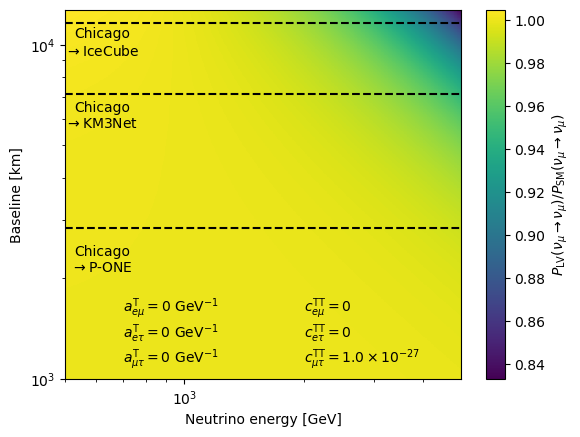

In [9]:
plt.pcolormesh(energies/1e9,baselines/1e3,osc_probs/osc_probs_SM)
plt.loglog()
c = plt.colorbar()
plt.xlabel(r"Neutrino energy [GeV]")
plt.ylabel(r"Baseline [km]")
c.set_label(r"$P_{\rm LV}(\nu_\mu \to \nu_\mu)/P_{\rm SM}(\nu_\mu \to \nu_\mu)$")
text_heights = np.linspace(3.05,3.2,3)
text_x_a,text_x_c = 700,2000
plt.text(text_x_a,10**text_heights[2],r"$a^{\rm T}_{e \mu} = %s~{\rm GeV}^{-1}$"%(sci_notation(aeu/1e9) if np.abs(aeu)>0 else "0"))
plt.text(text_x_a,10**text_heights[1],r"$a^{\rm T}_{e \tau} = %s~{\rm GeV}^{-1}$"%(sci_notation(aet/1e9) if aet>0 else "0"))
plt.text(text_x_a,10**text_heights[0],r"$a^{\rm T}_{\mu \tau} = %s~{\rm GeV}^{-1}$"%(sci_notation(aut/1e9) if aut>0 else "0"))
plt.text(text_x_c,10**text_heights[2],r"$c^{\rm TT}_{e \mu} = %s$"%(sci_notation(ceu) if ceu>0 else "0"))
plt.text(text_x_c,10**text_heights[1],r"$c^{\rm TT}_{e \tau} = %s$"%(sci_notation(cet) if cet>0 else "0"))
plt.text(text_x_c,10**text_heights[0],r"$c^{\rm TT}_{\mu \tau} = %s$"%(sci_notation(cut) if np.abs(cut)>0 else "0"))

plt.axhline(ICECUBE_BASELINE/1e3, color="black", linestyle="--")
plt.axhline(PONE_BASELINE/1e3, color="black", linestyle="--")
plt.axhline(KM3NeT_BASELINE/1e3, color="black", linestyle="--")

plt.text(plt.xlim()[0] + 120, ICECUBE_BASELINE/1e3 - 300,'Chicago\n$\\to$IceCube', verticalalignment="top", horizontalalignment="center")
plt.text(plt.xlim()[0] + 120, PONE_BASELINE/1e3 - 300,'Chicago\n$\\to$P-ONE', verticalalignment="top", horizontalalignment="center")
plt.text(plt.xlim()[0] + 120, KM3NeT_BASELINE/1e3 - 300,'Chicago\n$\\to$KM3Net', verticalalignment="top", horizontalalignment="center")